# Optimal Portfolio Weights
## Modern Portfolio Theory for Crop Diversification

This notebook implements portfolio optimization to find mathematically optimal crop allocations.

We compare three strategies:
1. **Equal-weighted**: Simple 25% allocation to each crop (baseline)
2. **Minimum variance**: Minimizes volatility
3. **Maximum Sortino ratio**: Optimizes risk-adjusted returns

In [9]:
import sys
from pathlib import Path

project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from src.analysis import CropDiversificationAnalysis
from src.portfolio_optimization import PortfolioOptimizer

## 1. Load and Standardize Data

In [10]:
analysis = CropDiversificationAnalysis(
    rice_path="../data/rice",
    maize_path="../data/maize",
    wheat_path="../data/wheat",
    soybean_path="../data/soybean"
)

df = analysis.build_dataframe()
print("Data shape:", df.shape)
df.head()

Data shape: (36, 4)


,rice,maize,wheat,soybean
year,,,,
1981,-2.356569,-1.678105,-4.088085,-2.101428
1982,-1.371636,-1.139752,-1.007664,-1.732231
1983,-1.415915,-1.501934,-0.608490,-1.683463
1984,-1.130556,-1.169926,-0.352113,-1.457676
1985,-1.139552,-0.999669,-0.449098,-0.990265


## 2. Correlation Matrix

In [11]:
corr = analysis.correlation_matrix()
print("Correlation Matrix:")
print(corr.round(3))

Correlation Matrix:
          rice  maize  wheat  soybean
rice     1.000  0.973  0.888    0.959
maize    0.973  1.000  0.840    0.943
wheat    0.888  0.840  1.000    0.837
soybean  0.959  0.943  0.837    1.000


## 3. Initialize Portfolio Optimizer

In [12]:
optimizer = PortfolioOptimizer(df)

print("Mean returns (yield anomalies):")
print(optimizer.mean_returns.round(4))
print("\nCovariance matrix:")
print(optimizer.cov_matrix.round(4))

Mean returns (yield anomalies):
rice       0.0
maize     -0.0
wheat      0.0
soybean    0.0
dtype: float32

Covariance matrix:
           rice   maize   wheat  soybean
rice     1.0286  1.0011  0.9139   0.9859
maize    1.0011  1.0286  0.8642   0.9703
wheat    0.9139  0.8642  1.0286   0.8606
soybean  0.9859  0.9703  0.8606   1.0286


## 4. Minimum Variance Portfolio

Minimum Variance Portfolio

Optimal Weights:
rice       0.0000
maize      0.2559
wheat      0.4521
soybean    0.2920
dtype: float64

Portfolio Volatility: 0.9682
Portfolio Return: 0.0000


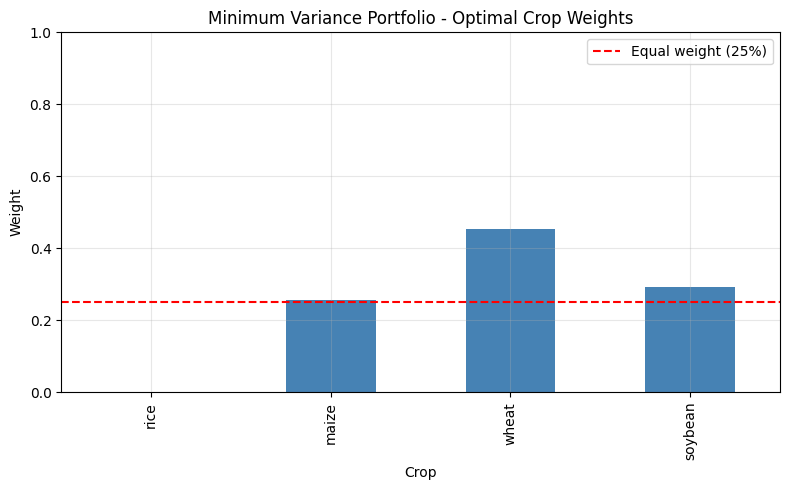

In [13]:
min_var = optimizer.minimum_variance_weights()

print("Minimum Variance Portfolio")
print("\nOptimal Weights:")
print(min_var['weights'].round(4))
print(f"\nPortfolio Volatility: {min_var['volatility']:.4f}")
print(f"Portfolio Return: {min_var['return']:.4f}")

plt.figure(figsize=(8, 5))
min_var['weights'].plot(kind='bar', color='steelblue')
plt.title("Minimum Variance Portfolio - Optimal Crop Weights")
plt.ylabel("Weight")
plt.xlabel("Crop")
plt.ylim(0, 1)
plt.axhline(0.25, color='red', linestyle='--', label='Equal weight (25%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Maximum Sortino Ratio Portfolio

In [14]:
max_sortino = optimizer.maximum_sortino_weights()

print("Maximum Sortino Ratio Portfolio")
print("\nOptimal Weights:")
print(max_sortino['weights'].round(4))
print(f"\nSortino Ratio: {max_sortino['sortino_ratio']:.4f}")
print(f"Portfolio Volatility: {max_sortino['volatility']:.4f}")
print(f"Portfolio Return: {max_sortino['return']:.4f}")

Maximum Sortino Ratio Portfolio

Optimal Weights:
rice       0.25
maize      0.25
wheat      0.25
soybean    0.25
dtype: float64

Sortino Ratio: 0.0000
Portfolio Volatility: 0.9781
Portfolio Return: 0.0000


## 6. Strategy Comparison

In [15]:
comparison = optimizer.compare_strategies()
print("\nPortfolio Strategy Comparison:")
print(comparison.to_string(index=False))


Portfolio Strategy Comparison:
        Strategy       Return  Volatility  Sortino Ratio
  Equal-Weighted 3.311369e-07    0.978081            NaN
Minimum Variance 3.977266e-07    0.968241            NaN
 Maximum Sortino 3.311369e-07    0.978081   3.407691e-07


## 7. Efficient Frontier

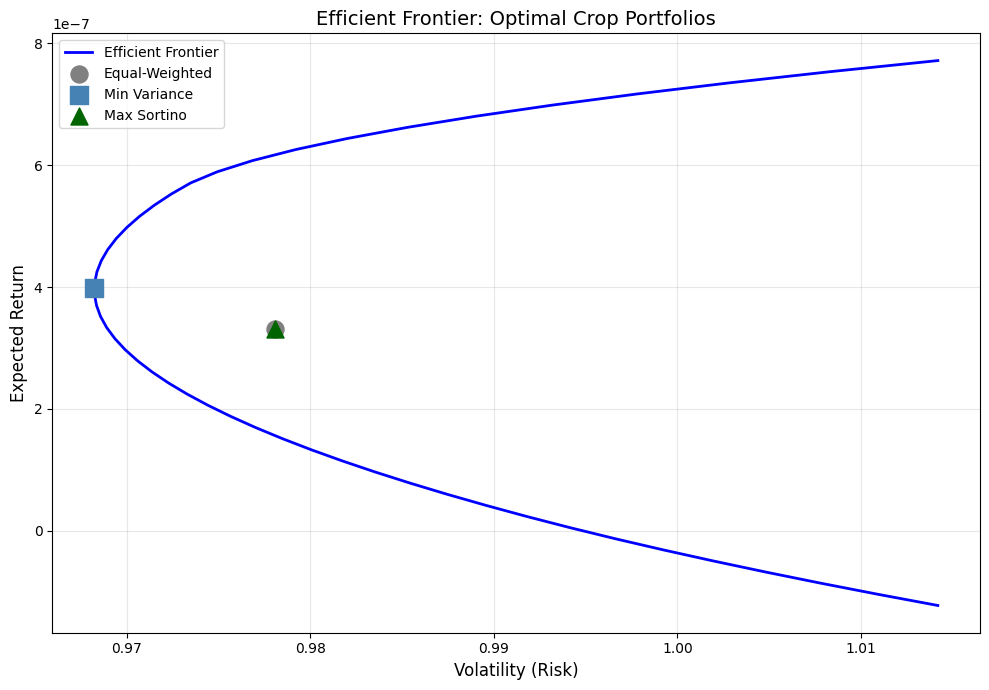

In [16]:
frontier = optimizer.efficient_frontier(n_points=50)

plt.figure(figsize=(10, 7))

plt.plot(frontier['volatility'], frontier['return'], 'b-', linewidth=2, label='Efficient Frontier')

equal_weights = np.array([0.25, 0.25, 0.25, 0.25])
equal_return = equal_weights @ optimizer.mean_returns
equal_vol = np.sqrt(equal_weights @ optimizer.cov_matrix @ equal_weights)

plt.scatter(equal_vol, equal_return, s=150, c='gray', marker='o', label='Equal-Weighted', zorder=5)
plt.scatter(min_var['volatility'], min_var['return'], s=150, c='steelblue', marker='s', label='Min Variance', zorder=5)
plt.scatter(max_sortino['volatility'], max_sortino['return'], s=150, c='darkgreen', marker='^', label='Max Sortino', zorder=5)

plt.xlabel('Volatility (Risk)', fontsize=12)
plt.ylabel('Expected Return', fontsize=12)
plt.title('Efficient Frontier: Optimal Crop Portfolios', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()